In [48]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image 
from sklearn.model_selection import train_test_split

In [49]:
mask_files = os.listdir('with_mask')
print(mask_files[0:5])
print(mask_files[-5:])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']
['with_mask_995.jpg', 'with_mask_996.jpg', 'with_mask_997.jpg', 'with_mask_998.jpg', 'with_mask_999.jpg']


In [50]:
nomask_files = os.listdir('without_mask')
print(nomask_files[0:5])
print(nomask_files[-5:])

['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']
['without_mask_995.jpg', 'without_mask_996.jpg', 'without_mask_997.jpg', 'without_mask_998.jpg', 'without_mask_999.jpg']


In [51]:
print(f'Number of with mask images:{len(mask_files)}')
print(f'Number of without mask images:{len(nomask_files)}')

Number of with mask images:3725
Number of without mask images:3828


In [52]:
# create the labels

mask_files = [1]*3725
nomask_files = [0]*3828

In [53]:
print(mask_files[0:5]),print(nomask_files[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


(None, None)

In [54]:
print(len(mask_files)),print(len(nomask_files))

3725
3828


(None, None)

In [55]:
labels = mask_files + nomask_files
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [56]:
with_mask_path = 'with_mask/'
mask_files = os.listdir(with_mask_path)

data = []

for img_file in mask_files:

  image = Image.open(with_mask_path + str(img_file))
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = 'without_mask/'
nomask_files = os.listdir(without_mask_path)

for img_file in nomask_files:

  image = Image.open(without_mask_path + str(img_file))
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [57]:
type(data),len(data)

(list, 7553)

In [58]:
data[0]

array([[[50, 58, 31],
        [46, 54, 34],
        [56, 59, 42],
        ...,
        [26, 32, 25],
        [29, 33, 18],
        [34, 40, 16]],

       [[47, 55, 30],
        [49, 57, 37],
        [59, 63, 40],
        ...,
        [18, 21, 11],
        [38, 42, 31],
        [31, 41, 22]],

       [[52, 58, 37],
        [50, 59, 38],
        [59, 64, 36],
        ...,
        [45, 44, 30],
        [29, 35, 28],
        [20, 30, 17]],

       ...,

       [[63, 72, 37],
        [66, 76, 41],
        [74, 84, 50],
        ...,
        [ 5,  4,  0],
        [20, 19, 15],
        [17, 17, 12]],

       [[59, 71, 34],
        [60, 70, 39],
        [68, 76, 50],
        ...,
        [16, 15, 12],
        [15, 13, 10],
        [13,  9,  7]],

       [[53, 69, 29],
        [54, 64, 37],
        [57, 63, 43],
        ...,
        [18, 18, 16],
        [16, 13, 12],
        [20, 12, 13]]], dtype=uint8)

In [59]:
type(data[0]),data[0].shape

(numpy.ndarray, (128, 128, 3))

In [60]:
 #converting image list and label list to numpy arrays

x = np.array(data)
y = np.array(labels)

In [61]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [62]:
print(x.shape, x_train.shape, x_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [63]:
# scaling the data

x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [64]:
x_train[0],x_train_scaled[0]

(array([[[ 40,  17,  13],
         [ 42,  18,  14],
         [ 46,  20,  16],
         ...,
         [ 45,  29,  30],
         [ 44,  29,  32],
         [ 44,  29,  32]],
 
        [[ 44,  18,  15],
         [ 47,  21,  17],
         [ 54,  25,  21],
         ...,
         [ 45,  30,  31],
         [ 44,  29,  32],
         [ 44,  29,  32]],
 
        [[ 53,  23,  18],
         [ 58,  27,  22],
         [ 69,  36,  30],
         ...,
         [ 44,  29,  30],
         [ 43,  28,  31],
         [ 43,  28,  31]],
 
        ...,
 
        [[138, 186, 165],
         [135, 186, 164],
         [127, 182, 161],
         ...,
         [177, 120, 111],
         [179, 122, 112],
         [181, 123, 114]],
 
        [[153, 189, 171],
         [150, 189, 170],
         [145, 188, 168],
         ...,
         [176, 119, 108],
         [178, 121, 109],
         [178, 121, 110]],
 
        [[158, 196, 177],
         [155, 196, 178],
         [151, 196, 176],
         ...,
         [174, 117, 106],
  

In [65]:
import tensorflow as tf
from tensorflow import keras

In [66]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [67]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [68]:
# training the neural network
history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 389s 2s/step - loss: 0.4533 - acc: 0.7997 - val_loss: 0.2748 - val_acc: 0.8909
Epoch 2/5
170/170 [==============================] - 301s 2s/step - loss: 0.2841 - acc: 0.8904 - val_loss: 0.1599 - val_acc: 0.9438
Epoch 3/5
170/170 [==============================] - 297s 2s/step - loss: 0.2423 - acc: 0.9099 - val_loss: 0.1860 - val_acc: 0.9041
Epoch 4/5
170/170 [==============================] - 289s 2s/step - loss: 0.1993 - acc: 0.9216 - val_loss: 0.1698 - val_acc: 0.9388
Epoch 5/5
170/170 [==============================] - 334s 2s/step - loss: 0.1602 - acc: 0.9389 - val_loss: 0.1834 - val_acc: 0.9256


In [69]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 25s 464ms/step - loss: 0.2502 - acc: 0.9232
Test Accuracy = 0.9232296347618103


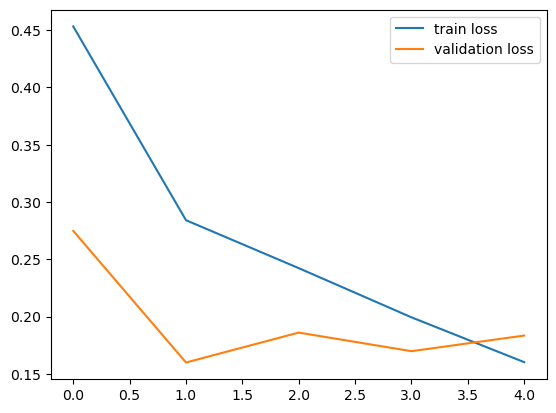

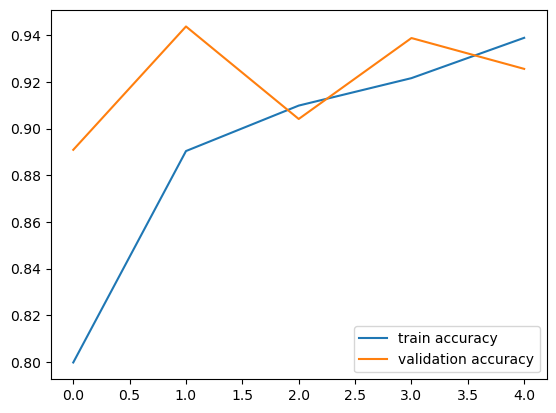

In [70]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()


In [74]:
pip install tensorflow-hub


     ---------------------------------------- 90.3/90.3 kB 5.3 MB/s eta 0:00:00


In [75]:
import tensorflow as tf
import tensorflow_hub as hub

In [76]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(128, 128, 3), trainable=False)

In [78]:
import tensorflow as tf
import tensorflow_hub as hub

num_of_classes = 2

pretrained_model = hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5")

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(128, 128, 3)),
    tf.keras.layers.Lambda(lambda x: tf.image.resize(x, (224, 224))),
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 224, 224, 3)       0         
                                                                 
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_6 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [79]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [80]:
model.fit(x_train_scaled, y_train, epochs=5)

Epoch 1/5
189/189 [==============================] - 427s 2s/step - loss: 0.0683 - acc: 0.9791
Epoch 2/5
189/189 [==============================] - 399s 2s/step - loss: 0.0236 - acc: 0.9934
Epoch 3/5
189/189 [==============================] - 289s 2s/step - loss: 0.0193 - acc: 0.9939
Epoch 4/5
189/189 [==============================] - 261s 1s/step - loss: 0.0142 - acc: 0.9967
Epoch 5/5
189/189 [==============================] - 278s 1s/step - loss: 0.0112 - acc: 0.9974


In [81]:
score, acc = model.evaluate(x_test_scaled, y_test)
print(f'Test Loss ={score}')
print(f'Test Accuracy ={acc}')

48/48 [==============================] - 82s 2s/step - loss: 0.0190 - acc: 0.9947
Test Loss =0.01900048367679119
Test Accuracy =0.9947054982185364
